# Проект "Анализ бизнес-показателей приложения Procrastinate Pro+"

###  Введение

Настоящее исследование посвящено анализу маркетинговой стратегии приложения Procrastinate Pro+. 

Целью анализа является выявление причин неэффективности рекламной кампании приложения, проведенной с 1 мая по 27 октября 2019 года, поиск конкретных просчетов и подготовка рекомендаций для их устранения. 

Перед исследованием поставлены следующие задачи: 

- выяснить, откуда приходят пользователи и какими устройствами они пользуются,
- рассчитать, сколько стоит привлечение пользователей из различных рекламных каналов;
- рассчитать, сколько денег приносит каждый клиент,
- выяснить, когда расходы на привлечение клиента окупаются,
- выявить, какие факторы мешают привлечению клиентов.

Для проведения анализа были предоставлены следующие данные: 
 
- Файл "visits_info_short.csv" хранит лог сервера с информацией о посещениях сайта, 
- файл "orders_info_short.csv" — информацию о заказах, 
- файл "costs_info_short.csv" — информацию о расходах на рекламу.

Исследование было разбито на несколько шагов: 

**Шаг 1.** Загрузка данных и подготовка их к анализу.  
**Шаг 2.** Подготовка функций для расчета и анализа.  
**Шаг 3.** Проведение исследовательского анализа данных.  
**Шаг 4.** Исследование маркетинговых показателей.  
**Шаг 5.** Оценка окупаемости рекламы.  
**Шаг 6.** Подготовка выводов и рекомендаций.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
# Импортируем необходимые для работы библиотеки

import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Откроем файлы и сохраним датасеты в переменные

visits = pd.read_csv ('/datasets/visits_info_short.csv')
orders = pd.read_csv ('/datasets/orders_info_short.csv')
costs = pd.read_csv ('/datasets/costs_info_short.csv')

In [4]:
# Выведем на экран первые 10 строк датасета visits и ознакомимся со структурой датасета

display (visits.head(10))

# Выясним, к какому типу относятся данные в различных столбцах датасета

display (visits.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

In [5]:
# Для удобства приведем названия столбцов к "змеиному" регистру

visits = visits.rename (columns = {'User Id':'user_id', 'Region':'region', 'Device':'device', 
                          'Channel':'channel', 'Session Start':'session_start', 'Session End':'session_end'})
display (visits.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Мы видим, что в столбцах с датой и временем начала и окончания сессии данные относятся к типу object, то есть являюся строками, тогда как для удобства и эффективности анализа было бы удобнее преобразовать их в тип datetime

In [6]:
# Преобразуем данные в тип datetime

visits ['session_start'] = pd.to_datetime (visits ['session_start'])
visits ['session_end'] = pd.to_datetime (visits ['session_end'])

In [7]:
# Выведем на экран число пропусков в столбцах датасета:

display (visits.isna().sum())

# Выведем на экран число дубликатов в столбцах датасета:

display (visits.duplicated().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

0

В датасете visits не обнаружено ни пропусков, ни дубликатов. Можно переходить к датасету orders

In [8]:
# Выведем на экран первые 10 строк датасета visits и ознакомимся со структурой датасета

display (orders.head(10))

# Выясним, к какому типу относятся данные в различных столбцах датасета

display (orders.info())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

In [9]:
# Для удобства приведем названия столбцов к "змеиному" регистру

orders = orders.rename (columns = {'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'})
display (orders.head())
                          

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
# Преобразуем данные в столбце в тип datetime

orders ['event_dt'] = pd.to_datetime (orders ['event_dt'])

In [11]:
# Выведем на экран число пропусков в столбцах датасета:

display (orders.isna().sum())

# Выведем на экран число дубликатов в столбцах датасета:

display (orders.duplicated().sum())

user_id     0
event_dt    0
revenue     0
dtype: int64

0

Повторим проделанное с датасетом costs:

In [12]:
# Выведем на экран первые 10 строк датасета costs и ознакомимся со структурой датасета

display (costs.head(10))

# Выясним, к какому типу относятся данные в различных столбцах датасета

display (costs.info())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [13]:
# Для удобства приведем названия столбцов к "змеиному" регистру

costs = costs.rename (columns = {'dt':'dt', 'Channel':'channel', 'costs':'costs'})
display (costs.head())
                  

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [14]:
# Преобразуем данные в столбце в тип datetime

costs ['dt'] = pd.to_datetime (costs ['dt']).dt.date

In [15]:
# Выведем на экран число пропусков в столбцах датасета:

display (costs.isna().sum())

# Выведем на экран число дубликатов в столбцах датасета:

display (costs.duplicated().sum())

dt         0
channel    0
costs      0
dtype: int64

0

Предобработка данных показала, что данные хорошо структурированы, не содержат пропусков и дубликатов. 
В результате предобработки названия столбцов были приведены к единому регистру, а стобцы с данными о дате и времени приведены к нужному типу.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

####  Функция get_profiles() для создания профилей пользователей

In [16]:
# Создадим функцию get_profiles() для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'device':'first', 'region':'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
                )
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    profiles ['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index() ) # возвращаем dt и channel из индексов
    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')
    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles 


#### Фунцкия get_retention() для подсчёта Retention Rate

In [17]:
# Создадим функцию get_retention() для подсчёта Retention Rate

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time


####  Функция get_conversion() для подсчёта конверсии

In [18]:
# Создадим функцию get_conversion() для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


#### Функция get_ltv() для подсчёта ltv

In [19]:
# Создадим функцию get_ltv()() для подсчёта ltv

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


#### Функция filter_data() для сглаживания данных

In [20]:
# Создадим функцию filter_data() для сглаживания данных

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция plot_retention() для построения графика Retention Rate

In [21]:
# Создадим функцию plot_retention() для построения графика Retention Rate

def plot_retention(retention):

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])


    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2 )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    plt.show()

#### Функция plot_conversion() для построения графика конверсии

In [22]:
# Создадим функцию plot_conversion() для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция plot_ltv_roi для визуализации LTV и ROI

In [23]:
# Создадим функцию plot_ltv_roi для визуализации LTV и ROI

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [24]:
#  Применим функцию `get_profiles()` к датасету visits для составления профилей пользователей

profiles = get_profiles(visits, orders, costs)
display (profiles.head(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Итого - более 150 тысяч пользовательских профилей.
Чтобы определить минимальную и максимальную дату привлечения пользователей, необходимо применить функции min() и max () к данным столбца first_ts.

In [25]:
# Вычислим минимальную дату привлечения пользователей

print ('Начало привлечения пользователей:', profiles['first_ts'].min())

Начало привлечения пользователей: 2019-05-01 00:00:41


In [26]:
# Вычислим максимальную дату привлечения пользователей

print ('Окончание привлечения пользователей:', profiles['first_ts'].max())

Окончание привлечения пользователей: 2019-10-27 23:59:04


Таким образом мы видим, что привлечение пользователей состоялось в промежутке между 1 мая и 27 октября 2019 года.

#### Распределение пользователей по странам

In [27]:
# Выведем на экран все страны, из которых пользователи заходят в приложение, 
# а также количество пользователей из каждой страны

profiles.groupby('region')['user_id'].count()

region
France            17450
Germany           14981
UK                17575
United States    100002
Name: user_id, dtype: int64

Нетрудно заметить, что среди всех пользователей приложения с большим отрывом лидируют пользователи из США.

In [28]:
# Выясним, на какую из стран приходится наибольшее количество платящих пользователей

profiles_region = profiles.pivot_table (
    index = 'region', columns ='payer', values = 'user_id', aggfunc = 'count')

profiles_region.columns = ['non_payer', 'payer']
profiles_region ['payer_perc'] = profiles_region ['payer'] / (
    profiles_region['payer']+profiles_region['non_payer']) * 100

display (profiles_region.sort_values(by='payer_perc', ascending = False))

,non_payer,payer,payer_perc
region,,,
United States,93100,6902,6.901862
Germany,14365,616,4.111875
UK,16875,700,3.982930
France,16787,663,3.799427


Среди пользователей из США также наиболее высок процент платящих пользователей - почти 7 процентов по сравнению с 4 процентами для пользователей из европейских стран


#### Распределение пользователей по устройствам

In [29]:
# Выведем на экран все устройства, из которых пользователи заходят в приложение, 
# а также количество пользователей для каждого устройства

profiles.groupby('device')['user_id'].count()

device
Android    35032
Mac        30042
PC         30455
iPhone     54479
Name: user_id, dtype: int64

Мы видим, что среди всех пользователей приложения с большим отрывом лидируют владельцы iPhone. Осталось проверить, какова ситуация среди платящих пользователей.

In [30]:
# Выясним, на какое из устройств приходится наибольшее количество платящих пользователей

profiles_device = profiles.pivot_table (
    index = 'device', columns ='payer', values = 'user_id', aggfunc = 'count')

profiles_device.columns = ['non_payer', 'payer']
profiles_device ['payer_perc'] = profiles_device ['payer'] / (
    profiles_device['payer']+profiles_device['non_payer']) * 100

display (profiles_device.sort_values(by='payer_perc', ascending = False))

,non_payer,payer,payer_perc
device,,,
Mac,28130,1912,6.364423
iPhone,51097,3382,6.207897
Android,32982,2050,5.851793
PC,28918,1537,5.046790


Как мы видим, несмотря на то, что среди всех пользователей лидируют владельцы iPhone, доля платящих пользователей несколько выше для пользователей Mac. Наиболее низкий показатель - у пользователей PC.

#### Распределение пользователей по источникам привлечения

In [31]:
# Выведем на экран все источники привлечения и количество пользователей из каждого источника

profiles.groupby('channel')['user_id'].count()


channel
AdNonSense             3880
FaceBoom              29144
LeapBob                8553
MediaTornado           4364
OppleCreativeMedia     8605
RocketSuperAds         4448
TipTop                19561
WahooNetBanner         8553
YRabbit                4312
lambdaMediaAds         2149
organic               56439
Name: user_id, dtype: int64

Очевидно значительное преобладание так называемых "органических" пользователей, однако необходимо выяснить, сохранится ли оно для платящих пользователей или нет

In [32]:
# Выясним, на какое из устройств приходится наибольшее количество платящих пользователей

profiles_channel = profiles.pivot_table (
    index = 'channel', columns ='payer', values = 'user_id', aggfunc = 'count')

profiles_channel.columns = ['non_payer', 'payer']
profiles_channel ['payer_perc'] = profiles_channel ['payer'] / (
    profiles_channel['payer']+profiles_channel['non_payer']) * 100

display (profiles_channel.sort_values(by='payer_perc', ascending = False))

,non_payer,payer,payer_perc
channel,,,
FaceBoom,25587,3557,12.204914
AdNonSense,3440,440,11.340206
lambdaMediaAds,1924,225,10.469986
TipTop,17683,1878,9.600736
RocketSuperAds,4096,352,7.913669
WahooNetBanner,8100,453,5.296387
YRabbit,4147,165,3.826531
MediaTornado,4208,156,3.574702
LeapBob,8291,262,3.063253


Несмотря на большой численный перевес "органических" пользователей, среди них наиболее низкий процент платящих (чуть более 2 процентов), тогда как для специализированных источников привлечения эта доля доходит до 10 и даже 12 процентов

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

Сначала посчитаем общую сумму расходов. Для этого сложим расходы на все рекламные кампании из столбца costs датасета costs.

In [33]:
total_costs = costs['costs'].sum()

print ('Общая сумма расходов:', total_costs)

Общая сумма расходов: 105497.30000000002


#### Распределение трат по рекламным источникам

Теперь необходимо изучить, как эти расходы распределены между рекламными источниками.

In [34]:
# Сгруппруем данные по источникам привлечения и посчитаем общую сумму расходов по каждому рекламному источнику:

costs_by_channel = costs.groupby('channel')['costs'].sum().sort_values (ascending = False)
display (costs_by_channel)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

In [35]:
# Выведем на экран долю общих рекламных расходов на каждый источник привлечения:

display (costs_by_channel.div (total_costs)*100)

channel
TipTop                51.898295
FaceBoom              30.754910
WahooNetBanner         4.882589
AdNonSense             3.707441
OppleCreativeMedia     2.039152
RocketSuperAds         1.737485
LeapBob                1.703930
lambdaMediaAds         1.476436
MediaTornado           0.904744
YRabbit                0.895018
Name: costs, dtype: float64

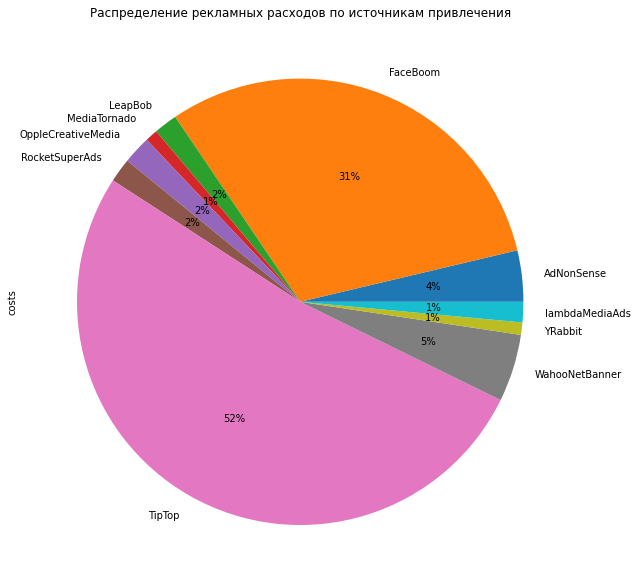

In [89]:
# Построим для наглядности график: 

costs.groupby('channel')['costs'].sum().plot(
    kind = 'pie', figsize = (10,15), title = 'Распределение рекламных расходов по источникам привлечения', 
    autopct='%1.0f%%');

Мы видим два источника привлечения пользователей, на которые было потрачено больше всего средств. Это TipTop (более половины от общей суммы) и FaceBoom (чуть меньше трети).

#### Динамика изменения расходов во времени

Теперь посмотрим, как изменялась сумма расходов во времени по каждому источнику, и отразим это на графиках.

/tmp/ipykernel_90/2929345058.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  costs ['week'] = pd.DatetimeIndex(costs['dt']).week


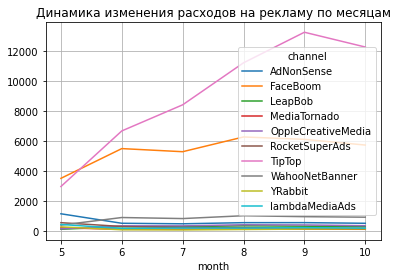

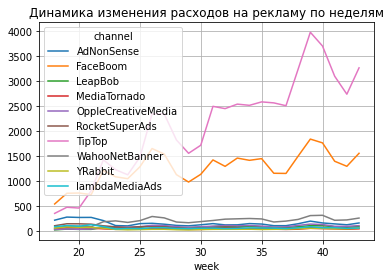

In [87]:
# Сначала добавим в таблицу сведения о месяце и неделе для каждой рекламной кампании: 

costs ['month'] = pd.DatetimeIndex(costs['dt']).month
costs ['week'] = pd.DatetimeIndex(costs['dt']).week

# Построим графики динамики изменения расходов на рекламу по месяцам и неделям:

costs_per_month = costs.pivot_table (index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_per_month.plot (grid = True, title = 'Динамика изменения расходов на рекламу по месяцам');

costs_per_week = costs.pivot_table (index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_per_week.plot (grid = True, title = 'Динамика изменения расходов на рекламу по неделям');

Мы видим, что за исключением двух платформ-лидеров, расходы на остальные источники практически не изменялись в течение анализируемого промежутка времени. Расходы на TipTop и  FaceBoom, напротив, демонстрируют изменчивость суммы расходов с тенденцией к постоянному росту

#### Стоимость привлечения одного пользователя из каждого источника

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [38]:
# Применим функцию get_profiles ()
profiles = get_profiles(visits, orders, costs)
display (profiles.head (10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [39]:
# рассчитаем САС по источникам привлечения:

cac1 = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac', ascending = False)
display (cac1)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [40]:
# удалим из датафрейма данные об органических пользователях:

profiles = profiles.query ('channel!="organic"')

In [41]:
# Выведем на экран усредненное значение для всех источников

display (profiles['acquisition_cost'].mean())

1.1274813239427588

Средняя стоимость привлечения одного пользователя (без разбивки по источникам привлечения) составляет $1.1.

Мы видим, что пользователи из TipTop в среднем почти в 3 раза дороже средних пользователей за аналогичный период (что и объясняет, почему на него приходится большая часть рекламного бюджета). При этом все остальные рекламные источники имеют САС ниже или равную средней для всех источников.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы: графики LTV, CAC и ROI

In [42]:
# Рассчитаем LTV с помощью функции get_ltv()

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=[], ignore_horizon=False)

display (ltv)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


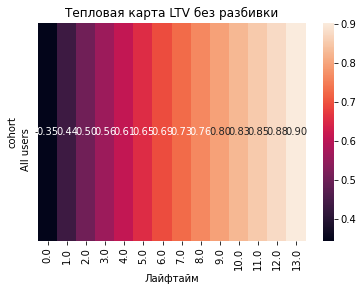

In [43]:
# Построим тепловую карту по таблице ltv

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

Мы видим, что LTV пользователей на 1 ноября 2019 года составляет $0.9, что ниже средней стоимости привлечения (без разбивки по источникам привлечения). 

In [44]:
# рассчитаем ROI:

display (roi)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


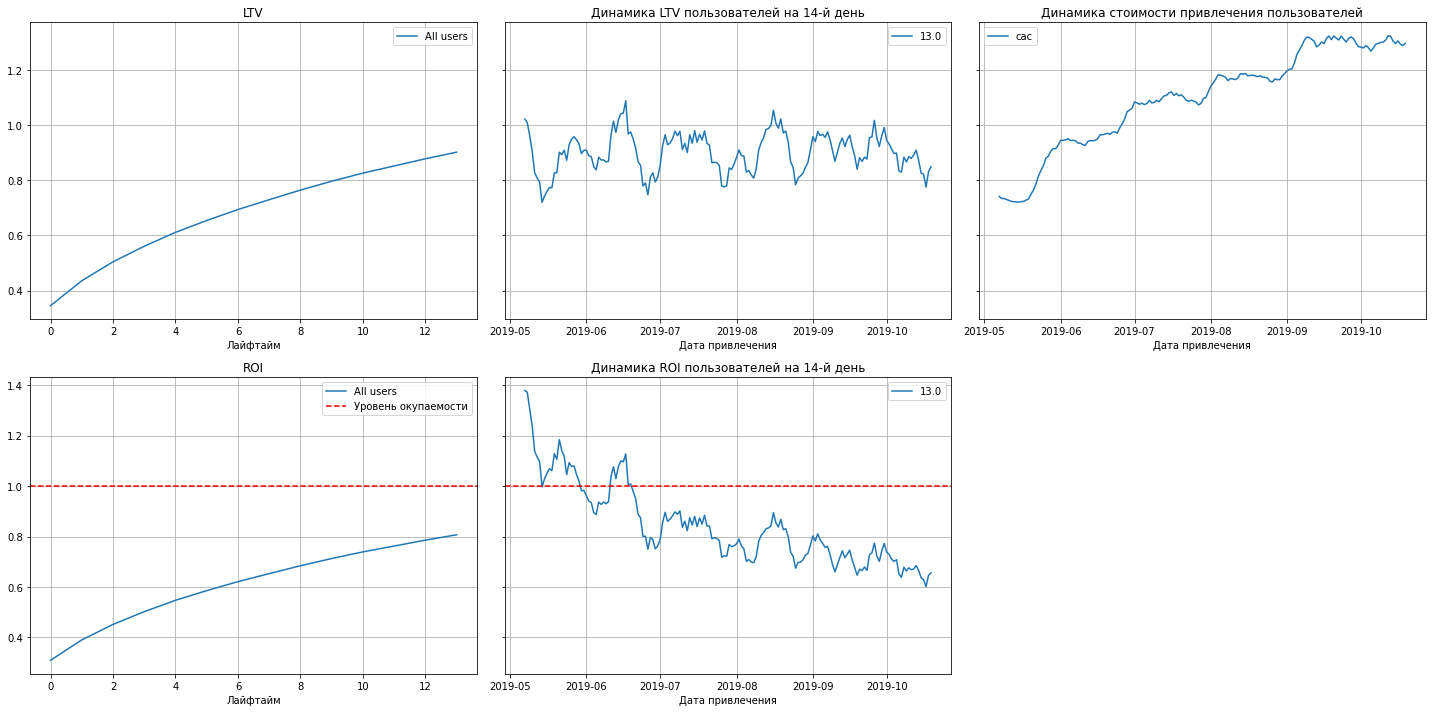

In [45]:
# Выведем на экран графики, воспользовавшись функцией plot_ltv_roi ()

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)


На основании анализа этих графиков можно сделать следующие выводы: 
- LTV пользователей постоянно растет и практически достигает отметки в 0.7 доллара;  
- LTV на 14-й день постоянно "скачет" и находится в промежутке между $0.5-0.9;
- показатель САС практически постоянно растет;
- показатель ROI растет на прожении всего рассматриваемого периода, однако не достигает уровня окупаемости к 14-му дню;
- пользователи, причлеченные в мае-июне окупились, а вот после июня показатель ROI демонстрировал тенденцию к снижению ниже уровня окупаемости.

#### Конверсия пользователей и динамика ее изменения

In [46]:
# Рассчитаем конверсию с помощью функции get_conversion ()

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=[], ignore_horizon=False)

display (conversion)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


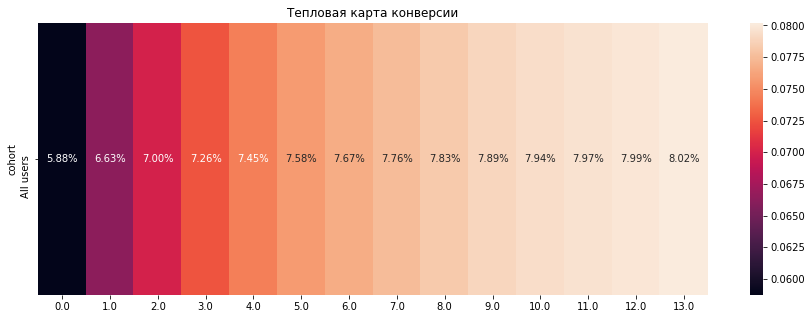

In [47]:
# Построим тепловую карту на основе полученных данных

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show() 

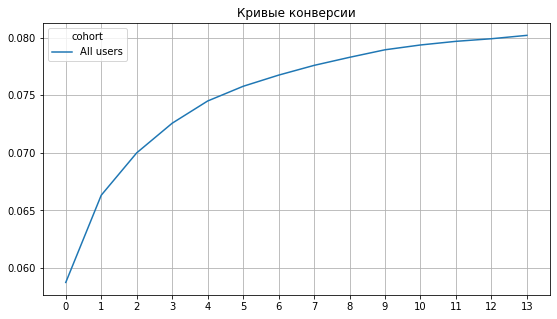

In [48]:
# Построим график кривых конверсии

plt.figure(figsize = (20, 5))
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии')

plt.show() 

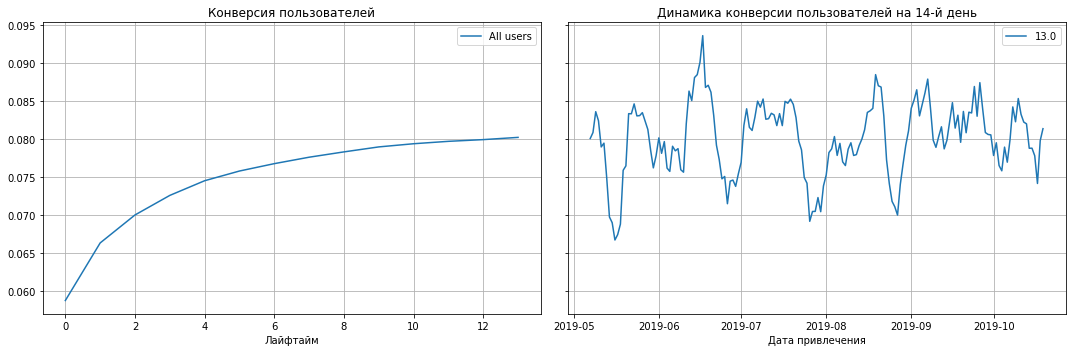

In [49]:
# Построим графики конверсии и динамики конверсии пользователей на 14-й день с помощью функции plot_conversion()

plot_conversion(conversion, conversion_history, 14, window=7)

Мы видим на графиках, что рост конверсии со временем замедляется. Если смотреть динамику в зависимости от даты привлечения пользователей, то мы увидим значительную разницу: лучше всего "конвертируются" пользователи, привлеченные в июне-июле, хуже всего - привлеченные в мае.

#### Удержание пользователей и динамика его изменения

In [50]:
# Рассчитаем коэффициент удержания с помощью функции get_retention()

retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, ignore_horizon=False)
display (retention)

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


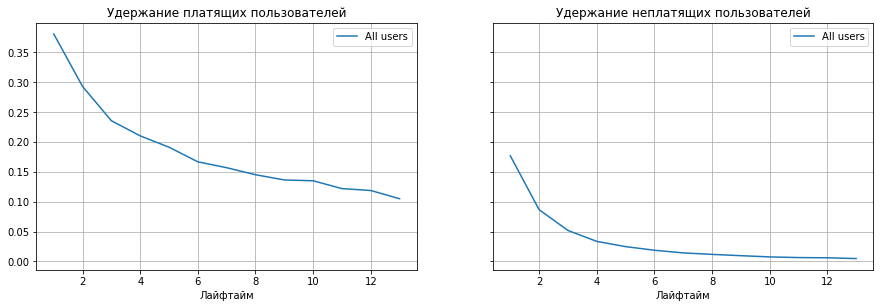

In [51]:
# Построим графики удержания платящих и неплатящих пользователей:

plot_retention(retention)

Мы видим, что на протяжении всего анализируемого периода удержание как платящих, так и неплатящих пользователей постоянно снижалось. Удержание платящих пользователей при этом всегда несколько выше, чем неплатящих.

#### Окупаемость рекламы: разбивка по рекламным каналам

##### LTV, CAC и ROI

Теперь можно посчитать LTV с разбивкой по источникам привлечения:

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
OppleCreativeMedia,8139,0.097239,0.131578,0.171686,0.206636,0.241103,0.266240,0.290152,0.309527,0.328544,0.346938,0.364228,0.376613,0.395017,0.409118
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668


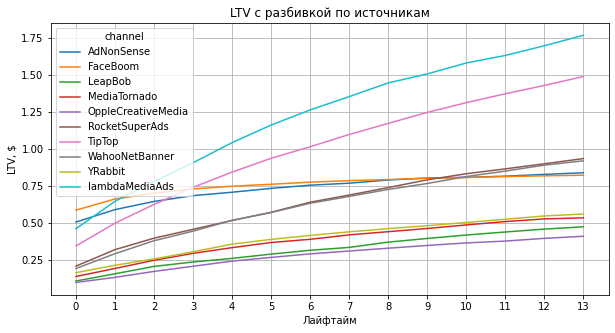

In [52]:
# находим LTV с разбивкой по каналам привлечения
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'], ignore_horizon=False)


# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

На графике видно, что наилучший результат с серьезным отрывом показывает lambdaMediaAds, за которым следует TipTop. Это единственные источники привлечения, по которым LTV превышает $1.

In [53]:
# рассчитаем САС по источникам привлечения:

cac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})
display (cac)

,cac
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


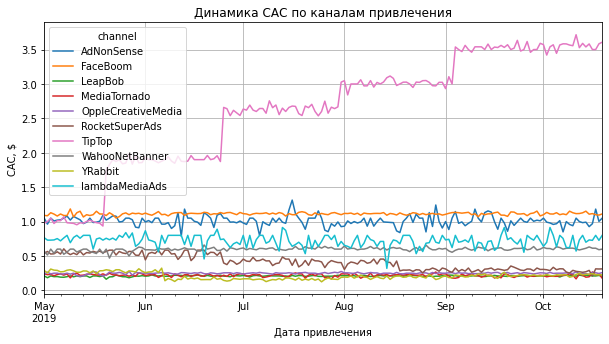

In [54]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

На графике прослеживается интересная закономерность: стоимость привлечения пользователя из TipTop растет на протяжении всего анализируемого периода, причем рост наблюдается практически в одно и то же время - в конце каждого месяца. Остальные же источники привлечения показывают приблизительно одинаковую стоимость привлечения на протяжении всего времени.

Далее рассчитаем ROI и построим график, чтобы оценить окупаемость рекламы из различных источников:

In [55]:
# рассчитаем ROI:

display (roi)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


Далее мы построим графики LTV и ROI с разбивкой по источникам привлечения, используя функцию plot_ltv_roi():

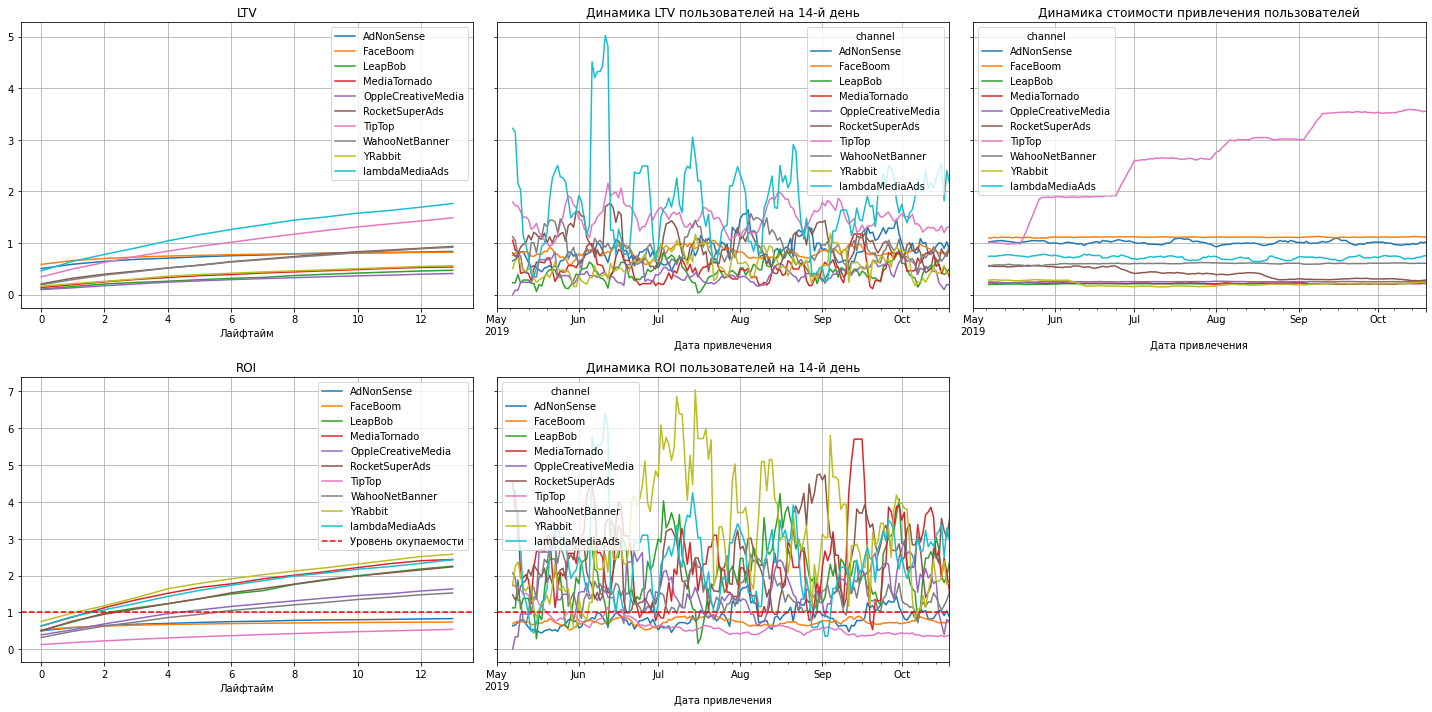

In [56]:
# Выведем на экран графики, воспользовавшись функцией plot_ltv_roi ()

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Мы видим, что далеко не все рекламные источники показывают окупаемость спустя 14 дней. Такие источники привлечения как TipTop, FaceBoom и AdNonSense не смогли достичь окупаемости за этот срок. А такие рекламные каналы как YRabbit, MediaTornado и lambdaMediaAds напротив, показали отличные результаты окупаемости.

##### Конверсия

Теперь можем посмотреть на конверсию с разбивкой по рекламным источникам.

In [57]:
# Рассчитаем конверсию с разбивкой по рекламным источникам с помощью функции get_conversion ()

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'], ignore_horizon=False)

display (conversion)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
OppleCreativeMedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055


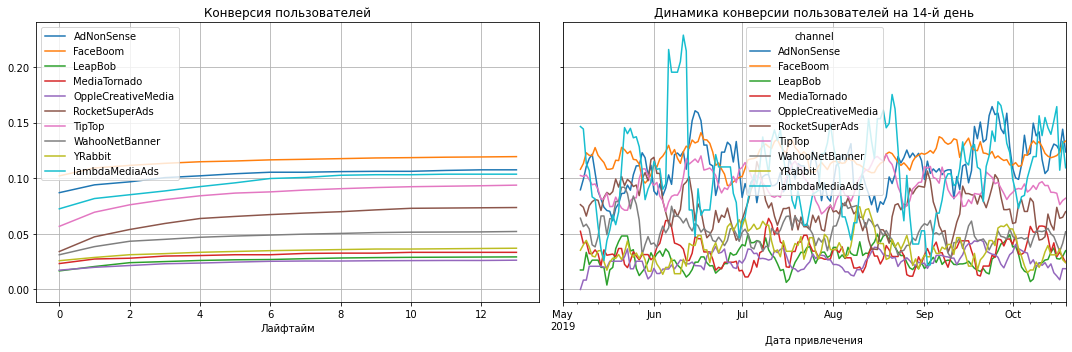

In [58]:
# Построим графики конверсии и динамики конверсии пользователей на 14-й день с помощью функции plot_conversion()

plot_conversion(conversion, conversion_history, 14, window=7)

Мы видим, что динамика конверсии по когортам приблизительно одинаковая для всех источников привлечения. А вот если мы посмотрим на динамику конверсии по рекламным источникам за 14 дней, то увидим, что для разных источников динамика конверсии будет совершенно разной.

##### Удержание

In [59]:
# Рассчитаем коэффициент удержания с помощью функции get_retention()

retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['channel'], ignore_horizon=False)
display (retention)

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3289  1.0  0.176345  0.087565  0.051079   
      FaceBoom                  24182  1.0  0.172980  0.087214  0.050782   
      LeapBob                    7860  1.0  0.171120  0.091349  0.051272   
      MediaTornado               4019  1.0  0.183130  0.082359  0.056482   
      OppleCreativeMedia         7919  1.0  0.171991  0.089026  0.053416   
      RocketSuperAds             3916  1.0  0.175179  0.085802  0.051328   
      TipTop                    16713  1.0  0.181715  0.084605  0.050859   
      WahooNetBanner             7654  1.0  0.184217  0.085446  0.053044   
      YRabbit                    3946  1.0  0.180182  0.083376  0.049164   
      lambdaMediaAds             1836  1.0  0.183007  0.086601  0.062636   
True  AdNonSense                  413  1.0  0.285714  0.162228  0.130751   
      FaceBoom                   3362  1.0  0.222487  0.123141  0.075253   
      LeapBob                     243  1.0  0.555556  0.493827  0.395062   
      MediaTornado                148  1.0  0.500000  0.452703  0.351351   
      OppleCreativeMedia          220  1.0  0.536364  0.459091  0.400000   
      RocketSuperAds              335  1.0  0.573134  0.468657  0.400000   
      TipTop                     1785  1.0  0.532773  0.464426  0.408964   
      WahooNetBanner              428  1.0  0.553738  0.511682  0.387850   
      YRabbit                     156  1.0  0.564103  0.384615  0.397436   
      lambdaMediaAds              220  1.0  0.563636  0.490909  0.395455   

                                 4         5         6         7         8  \
payer channel                                                                
False AdNonSense          0.037093  0.021587  0.018851  0.016722  0.011250   
      FaceBoom            0.032710  0.025267  0.019767  0.013605  0.011910   
      LeapBob             0.032443  0.023155  0.018830  0.014504  0.010941   
      MediaTornado        0.028614  0.024882  0.018661  0.011694  0.015924   
      OppleCreativeMedia  0.032201  0.026266  0.019194  0.014522  0.011870   
      RocketSuperAds      0.035495  0.020684  0.015066  0.016343  0.008682   
      TipTop              0.034943  0.026028  0.018848  0.013941  0.012086   
      WahooNetBanner      0.034492  0.022211  0.017507  0.015025  0.011759   
      YRabbit             0.035226  0.023822  0.016219  0.014192  0.009883   
      lambdaMediaAds      0.033224  0.031046  0.016340  0.014161  0.010893   
True  AdNonSense          0.077482  0.060533  0.058111  0.048426  0.055690   
      FaceBoom            0.057406  0.041344  0.038667  0.028257  0.020523   
      LeapBob             0.333333  0.395062  0.288066  0.246914  0.271605   
      MediaTornado        0.344595  0.351351  0.250000  0.229730  0.216216   
      OppleCreativeMedia  0.395455  0.313636  0.336364  0.272727  0.236364   
      RocketSuperAds      0.394030  0.331343  0.322388  0.325373  0.262687   
      TipTop              0.352381  0.345658  0.288515  0.287395  0.277871   
      WahooNetBanner      0.448598  0.383178  0.338785  0.345794  0.313084   
      YRabbit             0.371795  0.275641  0.262821  0.230769  0.262821   
      lambdaMediaAds      0.372727  0.372727  0.340909  0.327273  0.272727   

                                 9        10        11        12        13  
payer channel                                                               
False AdNonSense          0.011250  0.006081  0.005473  0.006993  0.006689  
      FaceBoom            0.010007  0.008064  0.005500  0.006616  0.004342  
      LeapBob             0.010433  0.007252  0.006616  0.005344  0.004835  
      MediaTornado        0.008460  0.007216  0.008957  0.004479  0.004976  
      OppleCreativeMedia  0.008461  0.008334  0.005556  0.007198  0.005683  
      RocketSuperAds      0.007661  0.007150  0.008427  0.003830  0.002809  
      TipTop        

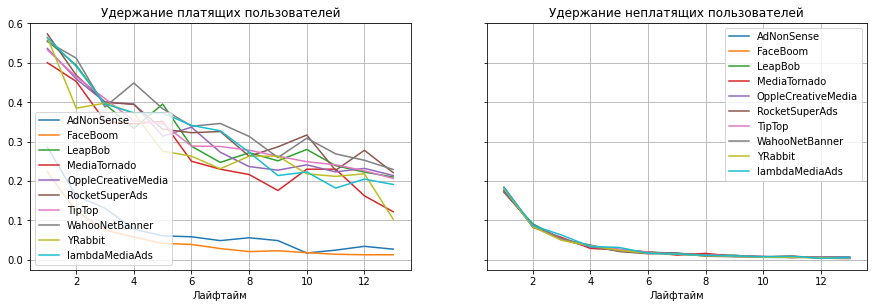

In [60]:
# Построим графики удержания платящих и неплатящих пользователей с разбивкой по источникам привлечения:

plot_retention(retention)

На графиках хорошо видна общая тенденция к снижению показателей удержания пользователей (как платящих, так и не платящих) с течением времени. Эта тенденция в целом соотносится со всеми рекламными источниками. Однако на первом графике можно заметить некоторые различия в динамике этого снижения. Так, для некоторых источников (таких как FaceBoom и AdNonSense) это снижение происходит достаточно рано, чуть ли не с самого начала лайфтайма. Для других источников периоды снижения перемежаются с периодами роста (например для MediaTornado или RocketSuperAds).

#### Окупаемость рекламы: разбивка по устройствам

##### LTV, CAC и ROI

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.339218,0.430766,0.500209,0.555218,0.608159,0.661395,0.699810,0.738562,0.773986,0.806850,0.833871,0.856068,0.887970,0.912098
Mac,17747,0.382235,0.480219,0.550124,0.605077,0.651197,0.685782,0.721831,0.752874,0.790957,0.825376,0.857376,0.884370,0.904617,0.930541
PC,18128,0.277400,0.361536,0.430422,0.485652,0.539617,0.581623,0.631240,0.661959,0.701004,0.729414,0.761510,0.788708,0.812106,0.836167
iPhone,32086,0.367928,0.456307,0.523902,0.583165,0.632132,0.673563,0.710708,0.749656,0.779956,0.812214,0.840427,0.867426,0.894400,0.916983


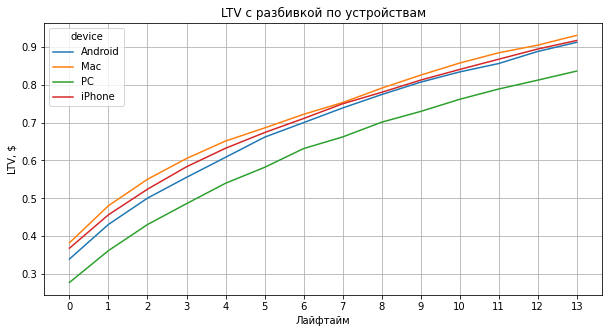

In [61]:
# находим LTV с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'], ignore_horizon=False)


# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по устройствам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Для всех устройств LTV растет приблизительно одинаковыми темпами. Наилучшие показатели у iPhone и Mac, несколько хуже - у Android, а наиболее низкий показатель - у PC.

In [62]:
# рассчитаем САС по устройствам:

cac = profiles.groupby('device').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})
display (cac)

,cac
device,
Android,1.028370
Mac,1.288960
PC,0.796917
iPhone,1.289144


Наиболее высокая стоимость привлечения у пользователей iPhone и Mac, а самая низкая - у пользователей РС.

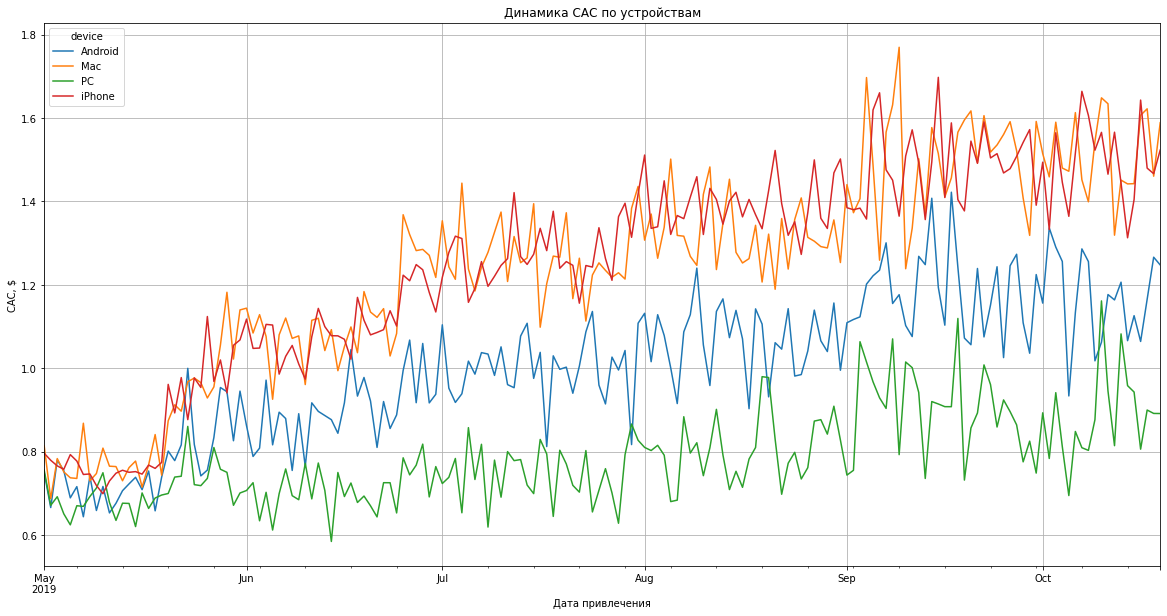

In [63]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='device', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам')
plt.show()

График динамики САС по устройствам демонстрирует резкий рост стоимости привлечения для пользователей на всех платформах в конце мая. Дальнейший рост намного более плавный и общая динамика по прежнему одинакова для пользователей всех устройств.

In [64]:
# рассчитаем ROI:

display (roi)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


График демонстрирует, что уровня окупаемости достигли лишь пользователи PC, тогда как привлечение владельцев iPhone, Android и Mac не окупилось

Далее мы построим графики LTV и ROI с разбивкой по устройствам, используя функцию plot_ltv_roi():

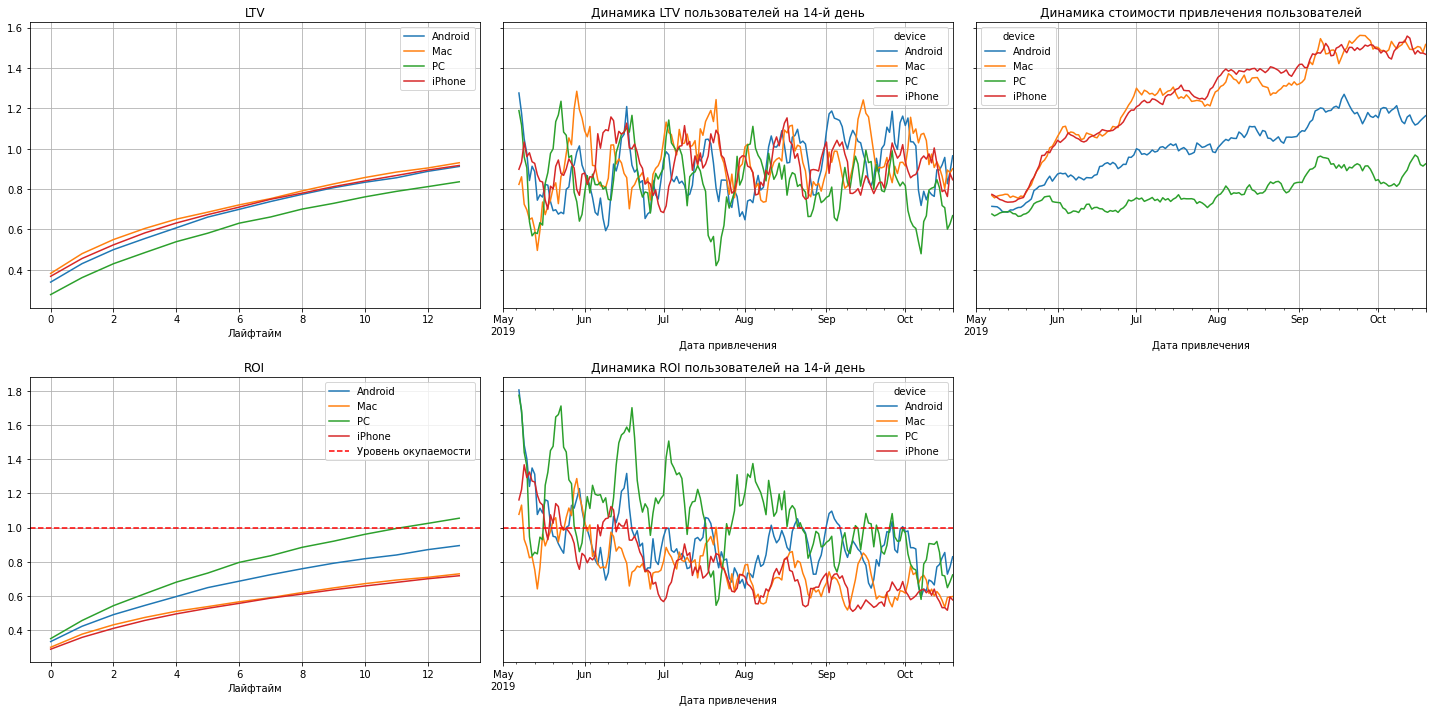

In [65]:
# Выведем на экран графики, воспользовавшись функцией plot_ltv_roi ()

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Мы видим, что стоимость привлечения пользователей со временем постоянно растет для всех устройств, однако для PC этот рост происходит намного медленнее, а для iPhone и Mac - намного быстрее. В итоге мы наблюдаем, что уровень окупаемости смогли преодолеть лишь пользователи PC.

In [66]:
# Построим таблицу, в которой отразим соотношение CAC в зависимости от устройства и рекламного источника:

profiles.pivot_table (index = 'channel', columns = 'device', values = 'acquisition_cost', aggfunc = 'mean')

device,Android,Mac,PC,iPhone
channel,,,,
AdNonSense,1.008804,1.007521,1.009183,1.005074
FaceBoom,1.113334,1.113293,1.113440,1.113224
LeapBob,0.210162,0.210166,0.210114,0.210306
MediaTornado,0.219691,0.219264,0.217739,0.218189
OppleCreativeMedia,0.249962,0.250642,0.249979,0.249766
RocketSuperAds,0.412512,0.409602,0.408516,0.414242
TipTop,2.793025,2.811246,2.823793,2.789315
WahooNetBanner,0.602106,0.601683,0.602117,0.602990
YRabbit,0.219535,0.218160,0.216627,0.219800


Мы видим, что использование различных устройств не влияет на стоимость привлечения - она остается практически одинаковой при использовании одного рекламного источника

##### Конверсия

Теперь можно посчитать конверсию с разбивкой по устройствам.

In [67]:
# Рассчитаем конверсию с разбивкой по устройствам с помощью функции get_conversion ()

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'], ignore_horizon=False)

display (conversion)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.058309,0.066141,0.070058,0.072378,0.074506,0.075714,0.076923,0.077552,0.078083,0.078809,0.079147,0.079437,0.079776,0.079921
Mac,17747,0.064349,0.072970,0.076802,0.079281,0.080971,0.082267,0.083225,0.084014,0.084747,0.085648,0.086268,0.086493,0.086606,0.087057
PC,18128,0.046613,0.053067,0.055991,0.058142,0.060293,0.061562,0.062665,0.063438,0.064100,0.064431,0.064707,0.064872,0.065093,0.065368
iPhone,32086,0.062800,0.070249,0.074113,0.077136,0.078944,0.080253,0.081001,0.082061,0.082871,0.083526,0.083962,0.084429,0.084648,0.084959


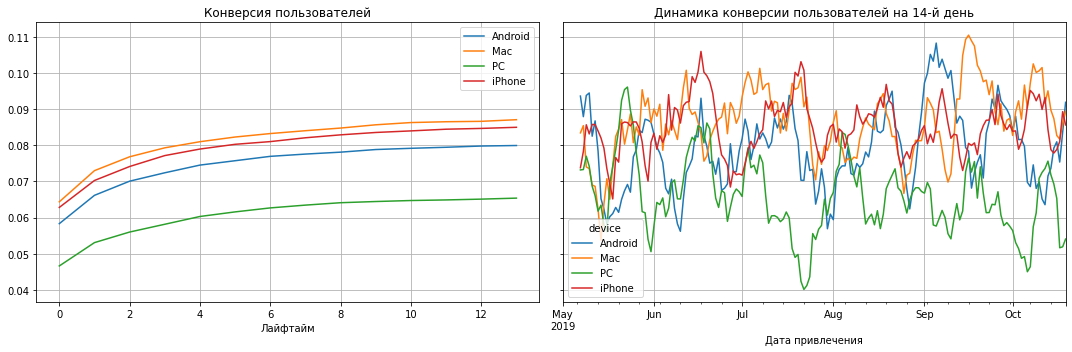

In [68]:
# Построим графики конверсии пользователей и динамики конверсии пользователей на 14-й день с помощью функции plot_conversion()

plot_conversion(conversion, conversion_history, 14, window=7)

На графиках мы видим, что к концу второй недели наиболее высокие показатели конверсии у Mac и iPhone, чуть ниже - у Android, и самые низкие - у PC.

##### Удержание

In [69]:
# Рассчитаем коэффициент удержания с помощью функции get_retention()

retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['device'], ignore_horizon=False)
display (retention)

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

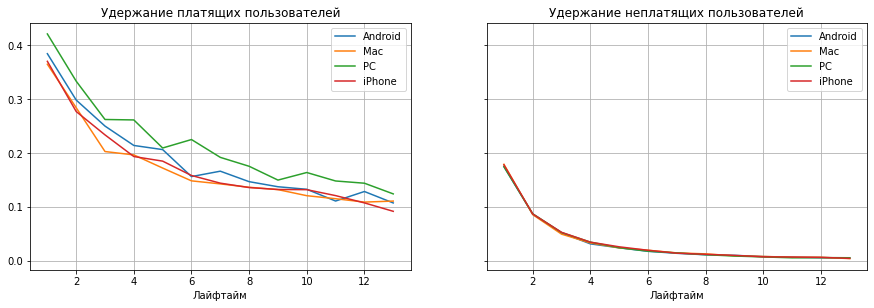

In [70]:
# Построим графики удержания платящих и неплатящих пользователей с разбивкой по устройствам:

plot_retention(retention)

Мы опять наблюдаем общую тенденцию к снижению удержания с течением времени. Среди платящих пользователей есть небольшая дифференциация показателей удержания: они несколько выше для пользователей PC по сравнению с остальными пользователями. Для неплатящих пользователей разницы практически нет: все пользователи удерживаются одинаково вне зависимости от устройства.

#### Окупаемость рекламы: разбивка по странам

##### LTV, CAC и ROI

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.193428,0.259783,0.311696,0.360199,0.406892,0.450173,0.481019,0.507213,0.541484,0.570906,0.600042,0.621870,0.649871,0.670278
Germany,9030,0.186350,0.258858,0.327945,0.375473,0.422776,0.460907,0.496938,0.534074,0.571104,0.605367,0.641507,0.665932,0.691355,0.713019
UK,10536,0.218683,0.296762,0.367626,0.416607,0.465505,0.503964,0.556090,0.585644,0.623741,0.645527,0.668830,0.692322,0.719800,0.743481
United States,58562,0.420285,0.519636,0.590981,0.651779,0.703511,0.747926,0.787655,0.825852,0.859873,0.893893,0.923530,0.950849,0.976382,1.001316


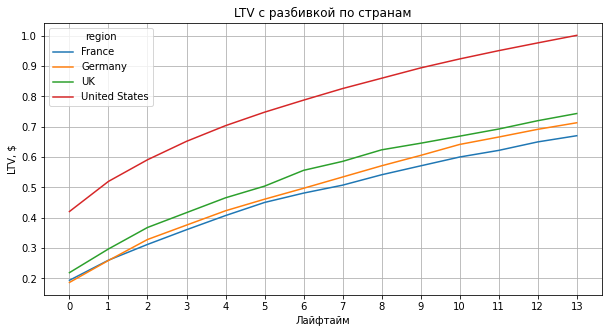

In [71]:
# находим LTV с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'], ignore_horizon=False)

# таблица LTV
display(ltv)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по странам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

График показывает значительное опережение показателя LTV для пользователей из США по сравнению с пользователями из европейских стран.

In [72]:
# рассчитаем САС по странам:

cac = profiles.groupby('region').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})
display (cac)

,cac
region,
France,0.459032
Germany,0.464339
UK,0.454411
United States,1.470646


Мы видим, что привлечение пользователей из США в среднем значительно дороже, чем привлечение пользователей из других стран 

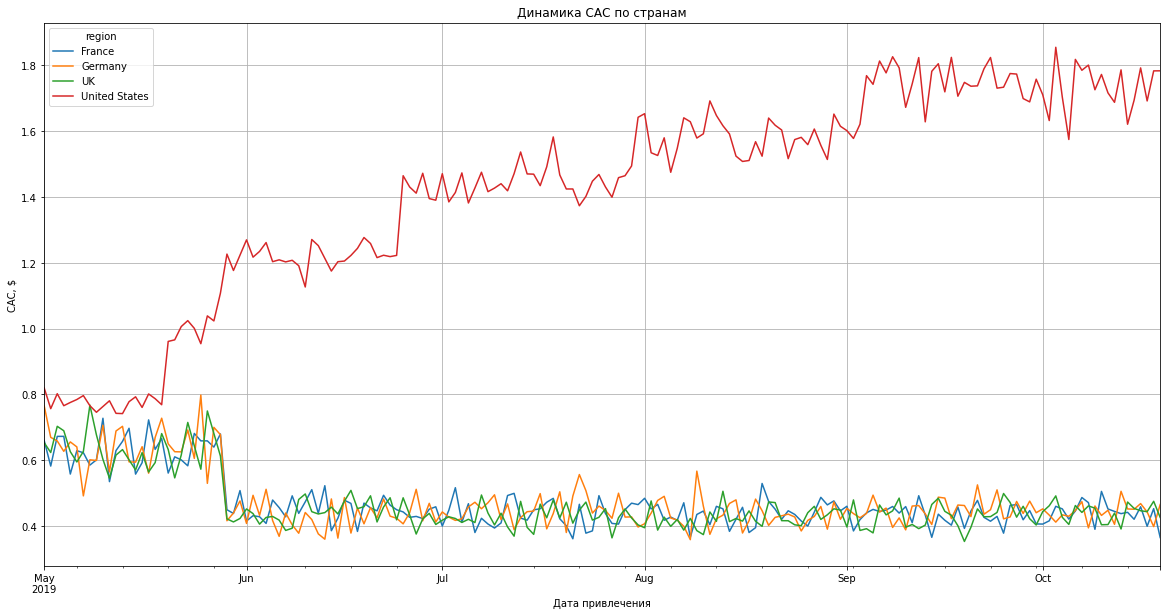

In [73]:
# строим график истории изменений CAC

roi_history.pivot_table(
    index='dt', columns='region', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по странам')
plt.show()

На графике можно наблюдать значительный и практически постоянный рост средней стоимости привлечения пользователей из США начиная с середины мая, тогда как стоимость привлечения пользователей из Европы в это время напротив, снизилась и после находилась в одном диапазоне с незначительными отклонениями на протяжении всего анализируемого периода.

In [74]:
# рассчитаем ROI:

display (roi)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,10516,0.459836,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,9030,0.464898,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,10536,0.454922,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,58562,1.455876,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


Несмотря на высокий показатель LTV, пользователи из США в итоге не окупаются к концу второй недели, несмотря на наиболее высокие показатели LTV (вероятно, из-за крайне высокой стоимости привлечения)

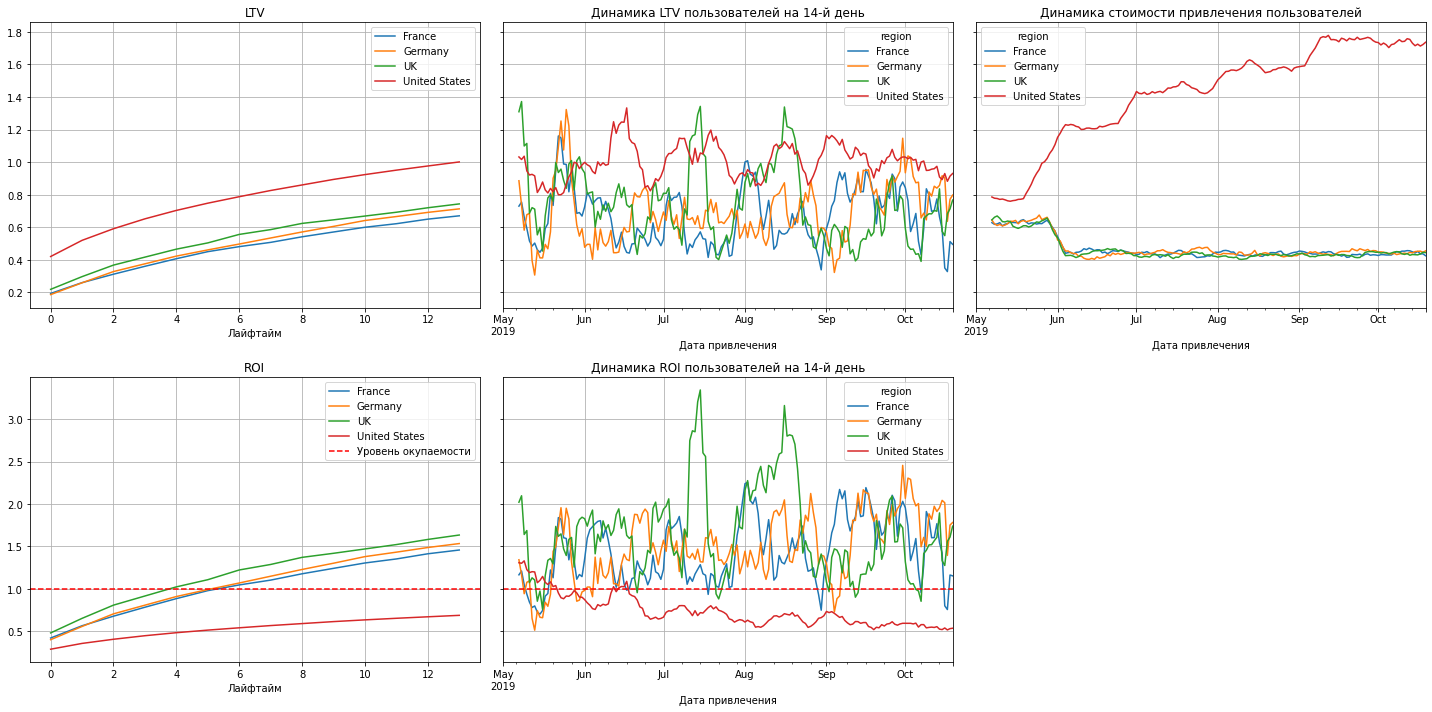

In [75]:
# Выведем на экран графики, воспользовавшись функцией plot_ltv_roi ()

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

In [76]:
# Построим таблицу, в которой отразим соотношение CAC в зависимости от страны и рекламного источника:

profiles.pivot_table (index = 'channel', columns = 'region', values = 'acquisition_cost', aggfunc = 'mean')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1.007553,1.008435,1.008224,NaN
FaceBoom,NaN,NaN,NaN,1.113286
LeapBob,0.210189,0.210380,0.209983,NaN
MediaTornado,NaN,NaN,NaN,0.218717
OppleCreativeMedia,0.249862,0.250091,0.250059,NaN
RocketSuperAds,NaN,NaN,NaN,0.412095
TipTop,NaN,NaN,NaN,2.799003
WahooNetBanner,0.602200,0.602161,0.602361,NaN
YRabbit,NaN,NaN,NaN,0.218975


Мы видим четкую привязку стран и используемых в них рекламных источников. Так, FaceBoom, TipTop, MediaTornado, RocketSuperAds и YRabbit используются на американском рынке, тогда как остальные источники - на европейском.

##### Конверсия

In [77]:
# Рассчитаем конверсию с разбивкой по странам с помощью функции get_conversion ()

conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'], ignore_horizon=False)

display (conversion)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.033092,0.037467,0.040985,0.042697,0.044313,0.045359,0.046120,0.046405,0.046976,0.047547,0.047642,0.048117,0.048307,0.048402
Germany,9030,0.032337,0.038760,0.041528,0.043854,0.045072,0.046512,0.047398,0.048283,0.049059,0.049612,0.049723,0.049834,0.049945,0.050498
UK,10536,0.034074,0.039104,0.042426,0.044039,0.045368,0.046412,0.047551,0.048121,0.048405,0.048595,0.048975,0.049070,0.049165,0.049165
United States,58562,0.071873,0.080650,0.084560,0.087497,0.089700,0.091032,0.092022,0.093013,0.093798,0.094566,0.095096,0.095454,0.095728,0.096069


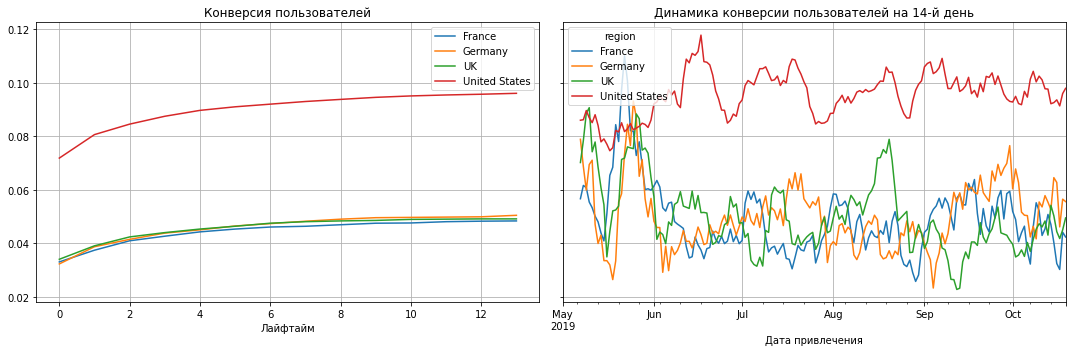

In [78]:
# Построим графики конверсии и динамики конверсии пользователей на 14-й день с помощью функции plot_conversion()

plot_conversion(conversion, conversion_history, 14, window=7)

Мы видим, что конверсия пользователей из США выше чем у пользователей из Европы практически в два раза, и что такая динамика наблюдается на протяжении всего анализируемого периода

##### Удержание

In [79]:
# Рассчитаем коэффициент удержания с помощью функции get_retention()

retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['region'], ignore_horizon=False)
display (retention)

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      Germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      UK                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      United States        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  France                 523  1.0  0.474187  0.386233  0.323136  0.307839   
      Germany                467  1.0  0.483940  0.402570  0.314775  0.327623   
      UK                     534  1.0  0.483146  0.421348  0.327715  0.299625   
      United States         5786  1.0  0.354822  0.263913  0.212755  0.183719   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022616  0.018213  0.014610  0.012108  0.010607   
      Germany        0.025225  0.019503  0.014014  0.010510  0.009926   
      UK             0.024595  0.017696  0.015897  0.011598  0.008498   
      United States  0.025030  0.018777  0.013813  0.011880  0.009474   
True  France         0.296367  0.246654  0.239006  0.223709  0.204589   
      Germany        0.284797  0.244111  0.220557  0.239829  0.211991   
      UK             0.277154  0.271536  0.247191  0.198502  0.155431   
      United States  0.166263  0.143623  0.136018  0.125475  0.122364   

                           10        11        12        13  
payer region                                                 
False France         0.007805  0.006304  0.005304  0.005504  
      Germany        0.007007  0.005722  0.006890  0.006540  
      UK             0.007299  0.006899  0.006399  0.004499  
      United States  0.007541  0.006423  0.005931  0.004301  
True  France         0.210325  0.168260  0.189293  0.173996  
      Germany        0.233405  0.173448  0.160600  0.134904  
      UK             0.168539  0.192884  0.183521  0.177903  
      United States  0.117179  0.106982  0.103007  0.089526

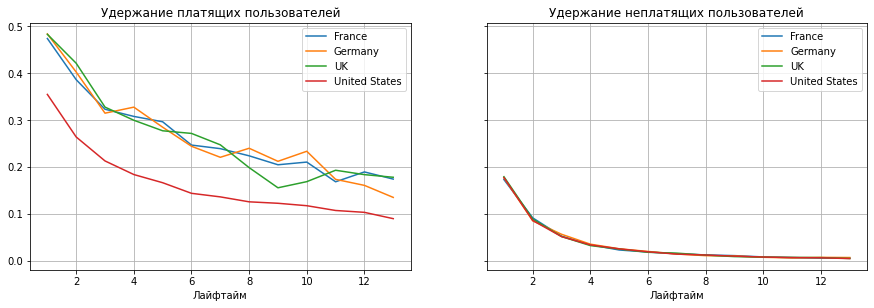

In [80]:
# Построим графики удержания платящих и неплатящих пользователей с разбивкой по странам:

plot_retention(retention)

Опять мы видим две закономерности: во-первых, удержание в среднем снижается, а во-вторых для неплатящих пользователей удержание одинаково, вне зависимости от страны. Для платящих пользователей видна еще одна закономерность: более низкий показатель удержания для пользователей из США, по сравнению с европейскими пользователями.

#### Выводы и рекомендации

##### Окупается ли реклама, направленная на привлечение пользователей в целом?

Первый вопрос, на который нам предстоит ответить: **Окупается ли реклама, направленная на привлечение пользователей в целом?**

Для того, чтобы дать ответ на него, сопоставим общую сумму расходов на рекламу и общую выручку:

In [81]:
print ('Общая сумма расходов на рекламу:', costs['costs'].sum())
print ('Общая сумма выручки:', orders['revenue'].sum())

Общая сумма расходов на рекламу: 105497.30000000002
Общая сумма выручки: 215962.88


**Вывод:** Мы видим, что глобально реклама окупилась (если не производить разбивку по каналам привлечения, устройствам и странам)




##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Следующий вопрос: **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

Проведенный анализ показал, что ряд рекламных каналов, устройств и стран не окупились за 14 дней, соответственно, они могут оказывать негативное влияние на показатели окупаемости рекламы в целом.

Среди рекламных источников можно выделить **TipTop**, **FaceBoom** и **AdNonSense** и выделить следующие причины неокупаемости:
- высокие показатели CAC;
- низкие показатели удержания пользователей (для FaceBoom и AdNonSense).

Среди устройств - **iPhone**, **Android**, **Mac**. Привлечение пользователей этих устройств может не окупиться ввиду следующих причин: 
- высокие показатели CAC;
- более низкий показатель удержания пользователей.

Среди стран - **США**. Это связано со следующими причинами:
- высокий показатель CAC;
- более низкий показатель удержания пользователей;
- использование неокупающихся рекламных источников (FaceBoom и TipTop).

Представляется, что первостепенной причиной является все же неэффективное распределение рекламного бюджета, и отказ от неокупающихся источников в пользу более перспективных может коренным образом изменить ситуацию.

##### Чем могут быть вызваны проблемы окупаемости?

Последний вопрос: **Чем могут быть вызваны проблемы окупаемости?**

Можно предположить, что используемые рекламные каналы напрямую влияют на показатели окупаемости рекламы среди пользователей различных стран, поскольку на американском и европейских рынках используются различные источники привлечения пользователей. Отказ от использования определенных источников или перераспределение рекламного бюджета привлечения могут существенно повлиять на окупаемость рекламы в той или иной стране или для пользователей различных устройств.

### Напишите выводы


#### Причины неэффективности привлечения пользователей.

Проведенный анализ позволяет назвать следующие причины неэффективности привлечения пользователей:

- некорректное распределение рекламного бюджета в пользу некоторых рекламных источников (впоследствии неокупившихся);
- использование рекламных источников с низкой конверсией;
- недостаточное использование эффективных рекламных источников.

#### Рекомендации для отдела маркетинга

- выяснить, с чем связан значительный рост стоимости привлечения пользователей из США в конце мая;
- выяснить, с чем связан значительный рост стоимости привлечения пользователей различных устройств в конце мая;
- отказаться от рекламных источников, показавших низкую конверсию при высоких затратах на привлечение пользователя, таких как TipTop;
- использовать другую структуру распределения рекламного бюджета;
- активнее закупать рекламу в lambdaMediaAds (для европейского рынка), MediaTornado и YRabbit (для американского) - пользователи из этих источников показывают высокий LTV при низкой стоимости привлечения, что делает их самыми окупающимися из всей подборки.